In [1]:
import pandas as pd
import geojson as gj
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import networkx as nx
import utils

In [2]:
nodes_gdf = gpd.read_file('Scigrid_data/IGGIN_Nodes.geojson')
nodes_gdf.head()

,name,id,country_code,tags,param,method,geometry
0,N_0,NO_N_0,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (6.79720 65.10640)
1,N_1,NO_N_1,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (5.19357 59.33286)
2,N_2,NO_N_2,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (2.89575 60.56023)
3,N_3,NO_N_3,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (2.89614 60.78219)
4,N_4,NO_N_4,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (3.29837 54.78877)


In [4]:
pipelines_df = utils.get_IGGIN_pipeline_data()
pipelines_df.head()

,id,name,source_id,lat,long,comment,tags,geometry,diameter_mm,end_year,is_H_gas,is_bothDirection,lat_mean,length_km,long_mean,max_cap_M_m3_per_d,max_pressure_bar,num_compressor,start_year,waterDepth_m,uncertainty_diameter_mm,uncertainty_end_year,uncertainty_is_H_gas,uncertainty_is_bothDirection,uncertainty_lat_mean,uncertainty_length_km,uncertainty_long_mean,uncertainty_max_cap_M_m3_per_d,uncertainty_max_pressure_bar,uncertainty_num_compressor,uncertainty_start_year,uncertainty_waterDepth_m,method_diameter_mm,method_end_year,method_is_H_gas,method_is_bothDirection,method_lat_mean,method_length_km,method_long_mean,method_max_cap_M_m3_per_d,method_max_pressure_bar,method_num_compressor,method_start_year,method_waterDepth_m,country_code_1,country_code_2,node_id_1,node_id_2
0,INET_PL_1,AlcazarDeSanJuan_Chinchilla,['INET_PL_1'],"[39.3900748, 38.892435]","[-3.3500984, -1.719831]",None,{},None,923.792529,2050,1.0,0.0,39.141255,151.139065,-2.534965,45.510317,75.0,3.0,1983.0,292.043469,187.663527,20,0.0,0.5,0.248820,0.5,0.815134,17.720386,11.628114,0.548387,20,162.72615,Lasso,make_Attrib(const),raw,make_Attrib(const),make_Attrib(latlong_mean),replace_length(PipeSegments),make_Attrib(latlong_mean),Lasso,Median,Median,make_Attrib(const),Lasso,ES,ES,INET_N_23,INET_N_295
1,INET_PL_3,Tarancon_Madrid,['INET_PL_3'],"[40.01, 40.223]","[-3.207, -3.681]",None,{},None,923.792529,2050,1.0,0.0,40.116500,46.764632,-3.444000,45.510317,75.0,3.0,1983.0,292.043469,187.663527,20,0.0,0.5,0.106500,0.5,0.237000,17.720386,11.628114,0.548387,20,162.72615,Lasso,make_Attrib(const),raw,make_Attrib(const),make_Attrib(latlong_mean),replace_length(PipeSegments),make_Attrib(latlong_mean),Lasso,Median,Median,make_Attrib(const),Lasso,ES,ES,INET_N_1460,INET_N_904
2,INET_PL_5,Alessandria_Cortemaggiore,['INET_PL_5'],"[44.991076, 44.90008]","[9.920891, 8.60944]",None,{},None,914.400000,2050,1.0,0.0,44.945578,103.739115,9.265165,45.510317,75.0,3.0,1983.0,292.043469,0.000000,20,0.0,0.5,0.045498,0.5,0.655725,17.720386,0.000000,0.548387,20,162.72615,raw,make_Attrib(const),raw,make_Attrib(const),make_Attrib(latlong_mean),replace_length(PipeSegments),make_Attrib(latlong_mean),Lasso,raw,Median,make_Attrib(const),Lasso,IT,IT,INET_N_317,INET_N_26
3,INET_PL_7,Almendralejo_Badajoz,['INET_PL_7'],"[38.711202, 38.87665]","[-6.382539, -6.9714]",None,{},None,923.792529,2050,1.0,0.0,38.793926,54.265677,-6.676970,45.510317,75.0,3.0,1983.0,292.043469,187.663527,20,0.0,0.5,0.082724,0.5,0.294430,17.720386,11.628114,0.548387,20,162.72615,Lasso,make_Attrib(const),raw,make_Attrib(const),make_Attrib(latlong_mean),replace_length(PipeSegments),make_Attrib(latlong_mean),Lasso,Median,Median,make_Attrib(const),Lasso,ES,ES,INET_N_36,INET_N_108
4,INET_PL_9,Almendralejo_Zamora,['INET_PL_9'],"[38.711202, 41.506]","[-6.382539, -5.644]",None,{},None,923.792529,2050,1.0,0.0,40.108601,317.146564,-6.013269,45.510317,75.0,3.0,1983.0,292.043469,187.663527,20,0.0,0.5,1.397399,0.5,0.369270,17.720386,11.628114,0.548387,20,162.72615,Lasso,make_Attrib(const),raw,make_Attrib(const),make_Attrib(latlong_mean),replace_length(PipeSegments),make_Attrib(latlong_mean),Lasso,Median,Median,make_Attrib(const),Lasso,ES,ES,INET_N_36,INET_N_1653


In [6]:
# Create a graph of the pipeline network
G = nx.DiGraph()

# Add the nodes to the graph
for i, row in nodes_gdf.iterrows():
    G.add_node(row['id'], pos=(row['geometry'].x, row['geometry'].y))

# Add the edges to the graph
for i, row in pipelines_df.iterrows():
    G.add_edge(row['node_id_1'], row['node_id_2'], data={'diameter_mm': row['diameter_mm'], 
                                                         'length_km': row['length_km'], 
                                                         'max_cap_M_m3_per_d': row['max_cap_M_m3_per_d'],
                                                         'max_pressure_bar': row['max_pressure_bar'],
                                                         'num_compressor': row['num_compressor'],
                                                         'water_depth_m': row['waterDepth_m'],
                                                         'is_bothDirection': row['is_bothDirection'],
                                                         'start_year': row['start_year'],
                                                         'end_year': row['end_year'],
                                                         'country_code_1': row['country_code_1'],
                                                         'country_code_2': row['country_code_2'],
                                                         'name': row['name']})

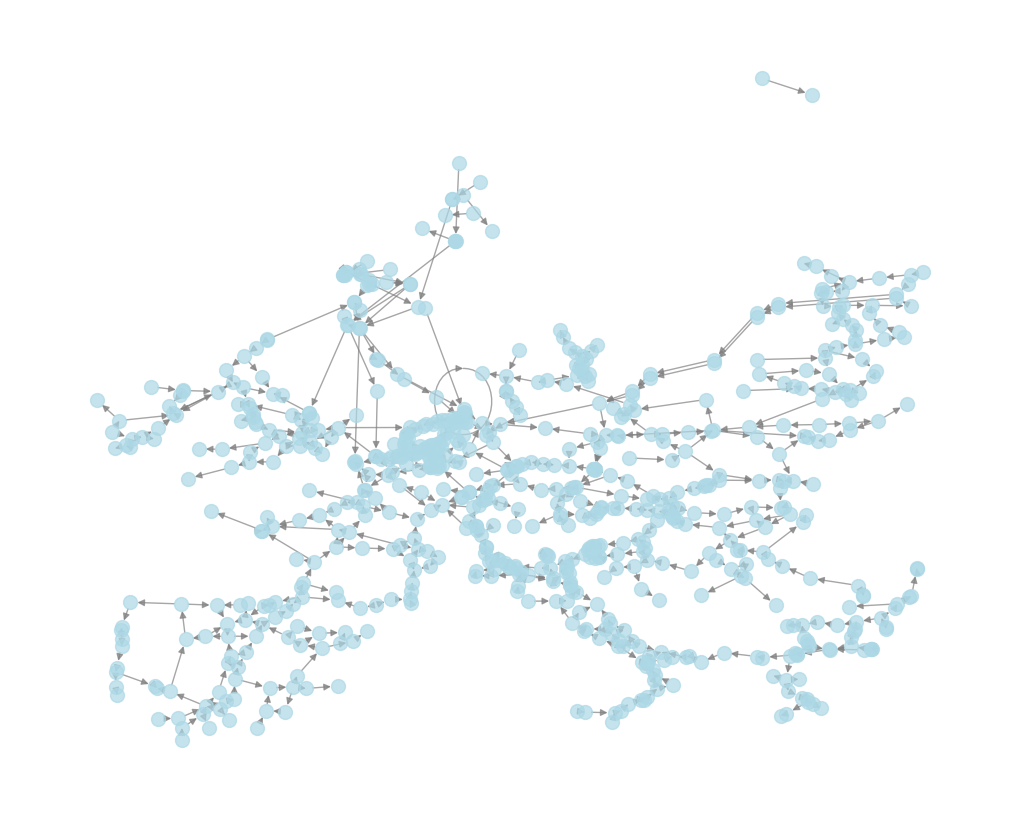

In [7]:
plt.figure(figsize=(10, 8))
nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), with_labels=False, node_size=100, node_color='lightblue', edge_color='gray', width=1, alpha=0.7)
plt.show()

In [8]:
for e in G.edges(data=True):
    u, v, data = e
    print(u, v, data)

NO_N_0 NO_N_1 {'data': {'diameter_mm': 1067.0, 'length_km': 691.3316609363375, 'max_cap_M_m3_per_d': 70.0, 'max_pressure_bar': 75.0, 'num_compressor': 3.0, 'water_depth_m': 372.0, 'is_bothDirection': 0.0, 'start_year': 2000.0, 'end_year': 2050, 'country_code_1': 'NO', 'country_code_2': 'NO', 'name': '42 Gas ASGARD ERB, KARSTO'}}
NO_N_1 NO_N_17 {'data': {'diameter_mm': 711.0, 'length_km': 206.6694750202705, 'max_cap_M_m3_per_d': 21.0, 'max_pressure_bar': 75.0, 'num_compressor': 3.0, 'water_depth_m': 300.0, 'is_bothDirection': 0.0, 'start_year': 1985.0, 'end_year': 2050, 'country_code_1': 'NO', 'country_code_2': 'NO', 'name': '28 Gas KARSTO, DRAUPNER S'}}
NO_N_2 NO_N_3 {'data': {'diameter_mm': 236.0, 'length_km': 24.922786666356668, 'max_cap_M_m3_per_d': 45.9638265425577, 'max_pressure_bar': 75.0, 'num_compressor': 3.0, 'water_depth_m': 176.0, 'is_bothDirection': 0.0, 'start_year': 1990.0, 'end_year': 2050, 'country_code_1': 'NO', 'country_code_2': 'NO', 'name': '9.3 Gas VESLEFRIKK A, ST